In [18]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from clean_data import load_and_clean_data
from preprocess_data import preprocess_data
import Datasets

# Paths to data
properties_2016_path = '../source_code/Datasets/properties_2016.csv'
train_2016_path = '../source_code/Datasets/train_2016_v2.csv'
properties_2017_path = '../source_code/Datasets/properties_2017.csv'
train_2017_path = '../source_code/Datasets/train_2017.csv'

# Load and clean data
df_train = load_and_clean_data(properties_2016_path, train_2016_path, properties_2017_path, train_2017_path)







In [19]:
# Preprocess the data
X_processed, y, preprocessor = preprocess_data(df_train)


In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [21]:


# Initialize and train the Linear Regression model
modellinreg = LinearRegression()
modellinreg.fit(X_train, y_train)

# Make predictions
y_pred_trainlinreg = modellinreg.predict(X_train)
y_pred_testlinreg = modellinreg.predict(X_test)

avg_predicted_logerrorlinreg = y_pred_testlinreg.mean()
avg_actual_logerrorlinreg = y_test.mean()




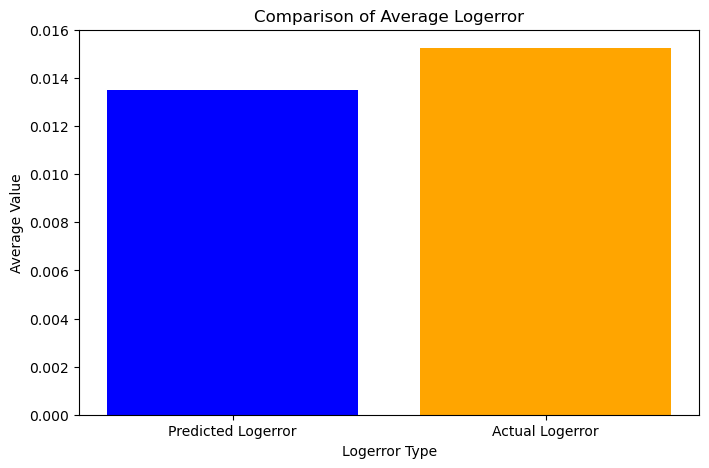

In [26]:
# Optional: Plot comparison of average logerror
plt.figure(figsize=(8, 5))
plt.bar(['Predicted Logerror', 'Actual Logerror'], [avg_predicted_logerrorlinreg, avg_actual_logerrorlinreg], color=['blue', 'orange'])
plt.xlabel('Logerror Type')
plt.ylabel('Average Value')
plt.title('Comparison of Average Logerror')
plt.show()

In [34]:
# Calculate the percentage difference
percentage_diff = (((avg_predicted_logerrorlinreg - avg_actual_logerrorlinreg)/avg_actual_logerrorlinreg)*100)
print(f"Percentage difference in Average Logerror : {percentage_diff:.2f}%")

Percentage difference in Average Logerror : -11.45%


In [38]:
# Feature importance plot
importances = modellinreg.feature_importances_
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]
top_indices = sorted_indices[:20]  # Top 20 features

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.grid(True)
plt.show()


AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'